In [6]:
using LinearAlgebra
using DelimitedFiles
using LsqFit
using Plots

In [7]:
# read the data from potential_data
data = readdlm("potential_data", skipstart=1)

x = data[:, 1]
E = data[:, 2]

5-element Vector{Float64}:
 -2324.43478737
 -2324.81103781
 -2324.92073811
 -2324.82997754
 -2324.58876119

### First fit

Best fit parameters: [-2323.7387648615027, -0.8761766983958771, 0.189598946260587, -0.00967453013724633]


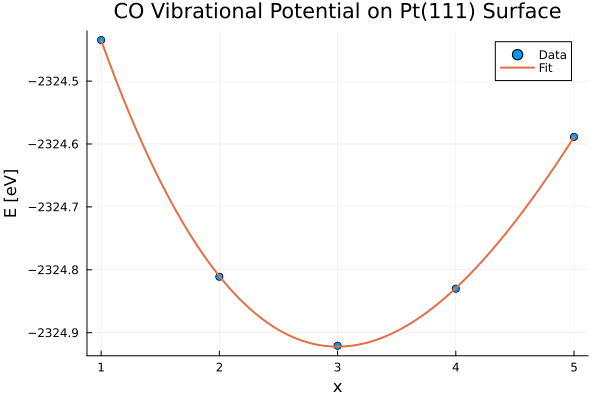

In [9]:
model(x, p) = p[1] .+ p[2] * x .+ p[3] * x.^2 .+ p[4] * x.^3
initial_params = [1000.0, - 1.0, 0.0, 0.0]
fit_result = curve_fit(model, x, E, initial_params)

best_fit_params = fit_result.param

println("Best fit parameters: ", best_fit_params)

# plot the data and the fit
x_plot = range(minimum(x), stop=maximum(x), length=100)
scatter(x, E, label="Data", xlabel="x", ylabel="E [eV]", title="CO Vibrational Potential on Pt(111) Surface")
plot!(x_plot, model(x_plot, best_fit_params), label="Fit", linewidth=2)